In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

In [4]:
'''
getting some data
'''
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
dataset_fname = 'bursi.pos.gspan'
def get_graphs(size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

In [5]:
%%time
'''
induce a grammar and train an estimator
'''
from graphlearn.graphlearn import GraphLearnSampler
training_graphs = get_graphs(size=500)
sampler=GraphLearnSampler(radius_list=[0,1],thickness_list=[1],min_cip_count=2, min_interface_count=2)
sampler.fit(training_graphs,n_jobs=-1,batch_size=10)

CPU times: user 21.4 s, sys: 2.68 s, total: 24.1 s
Wall time: 27.8 s


Graph id: 50


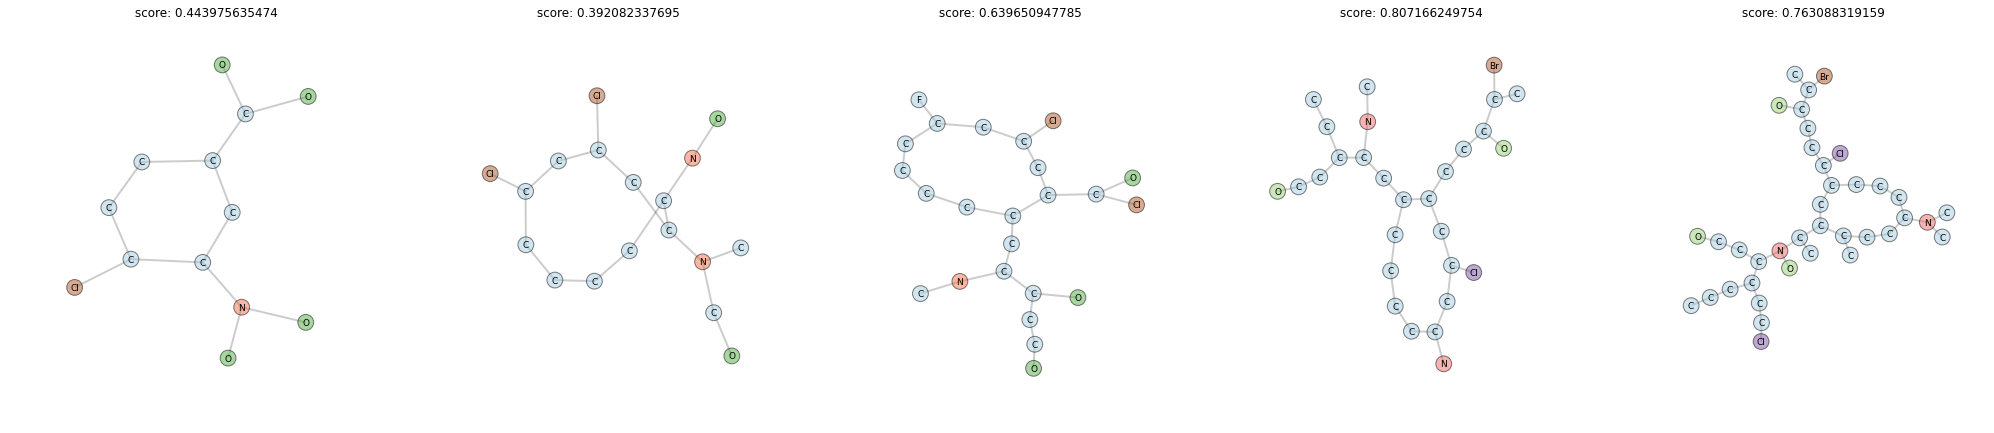

Graph id: 51
printing le errer
candidates


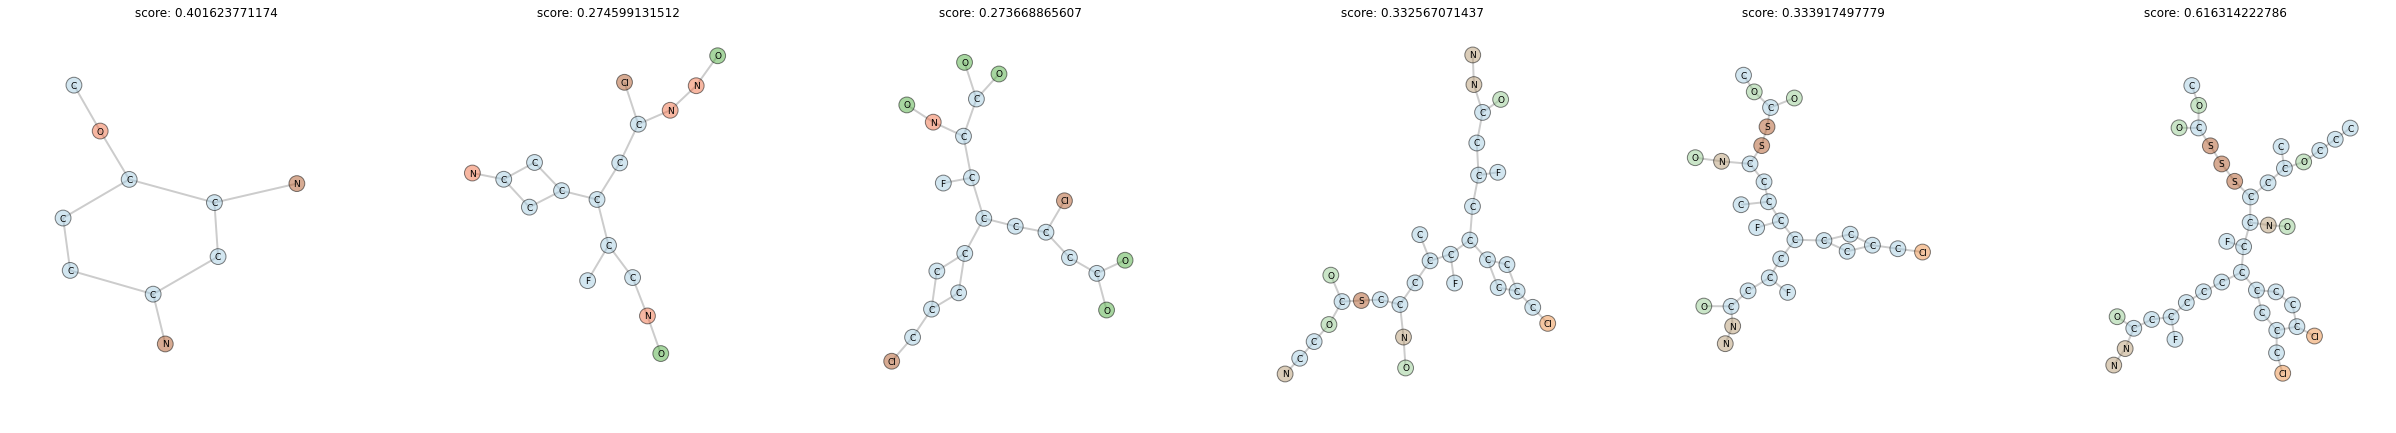

Graph id: 52


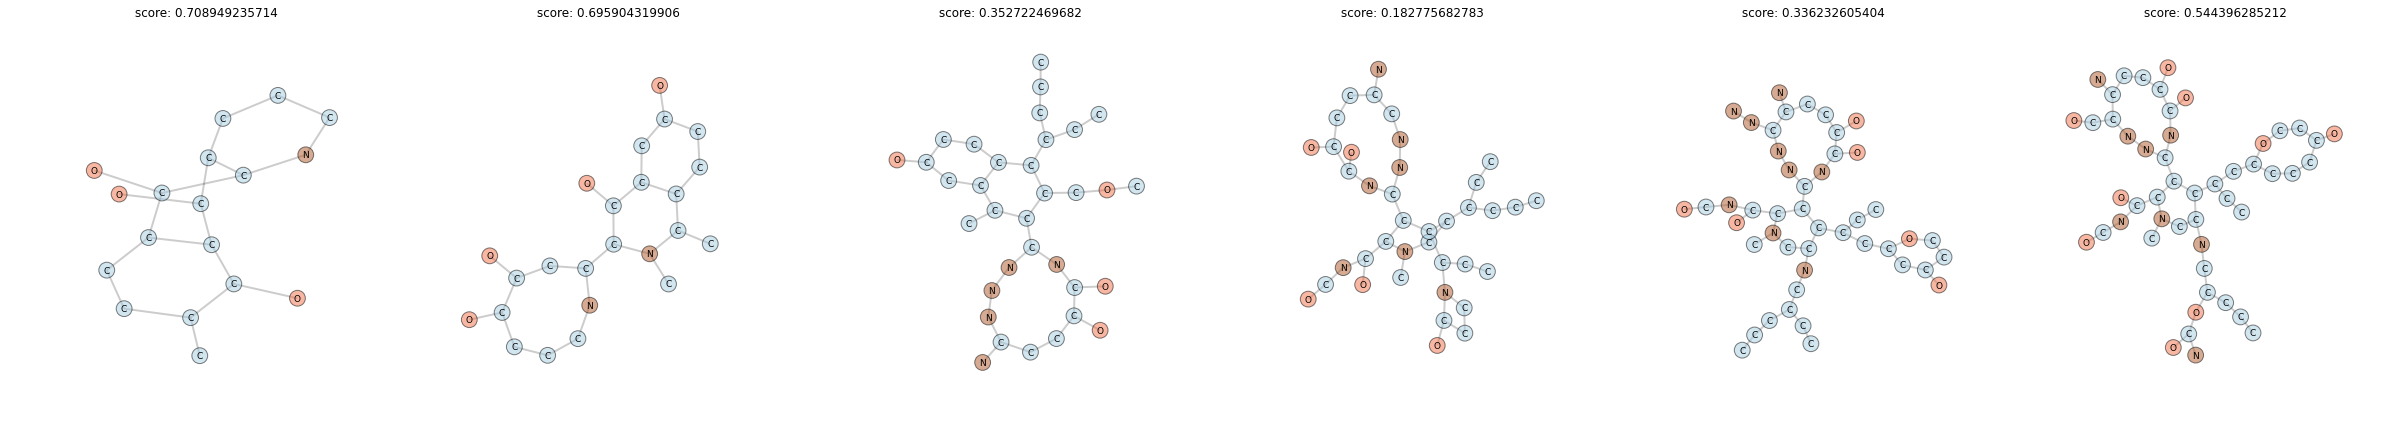

Graph id: 53


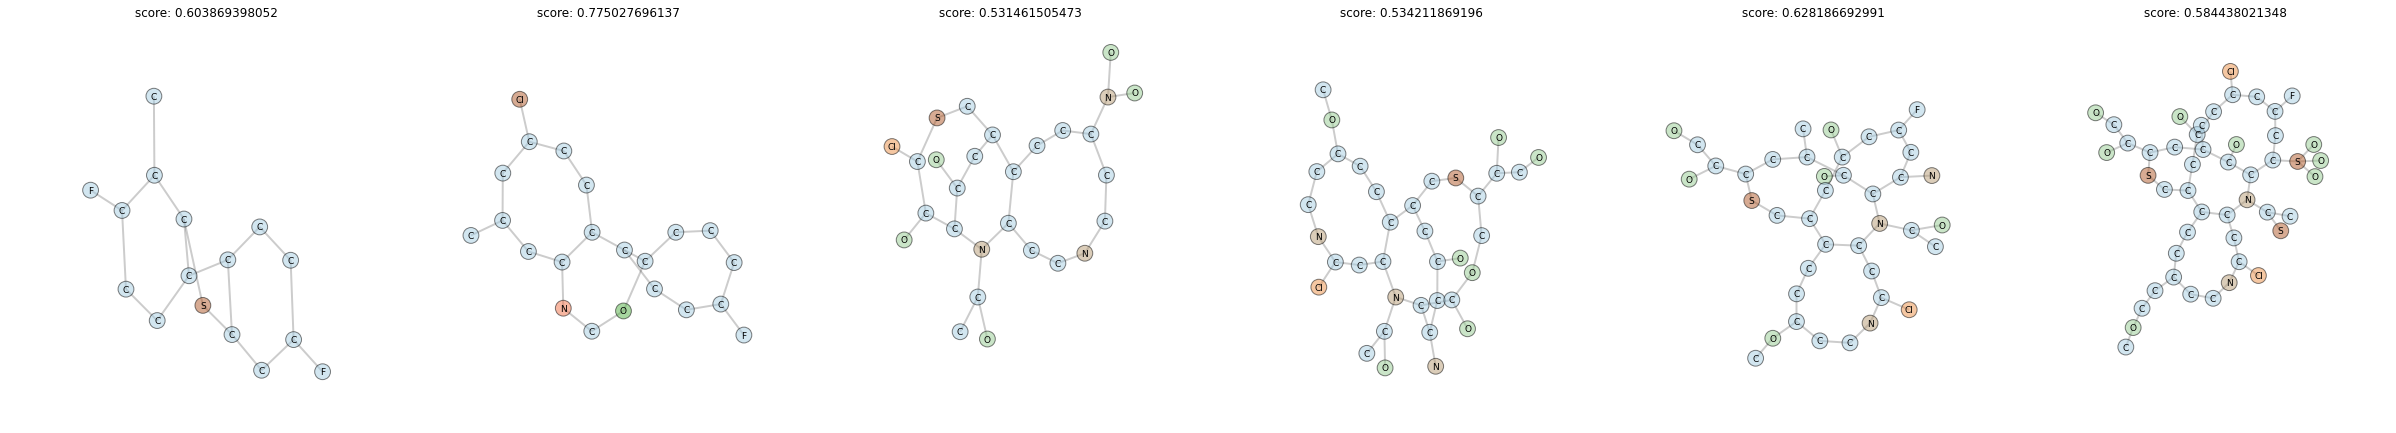

Graph id: 54


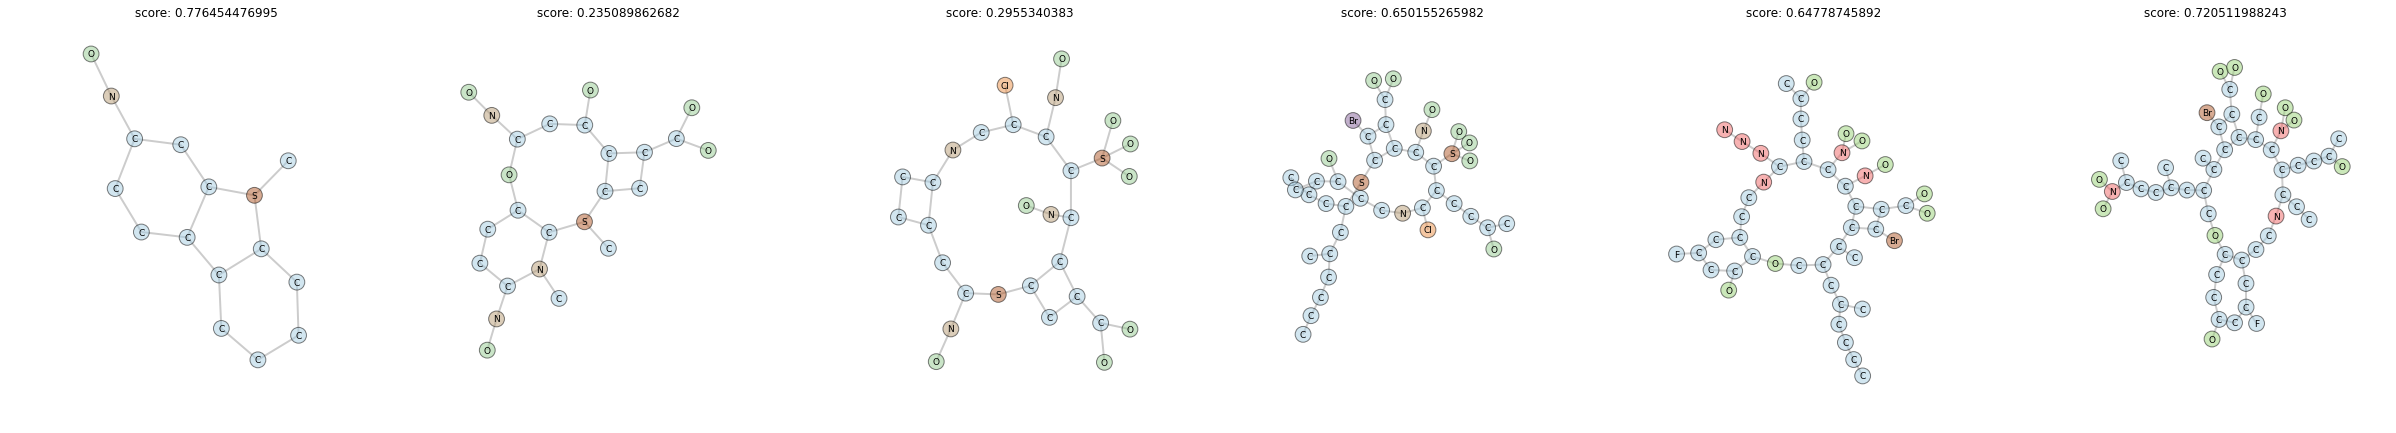

Graph id: 55


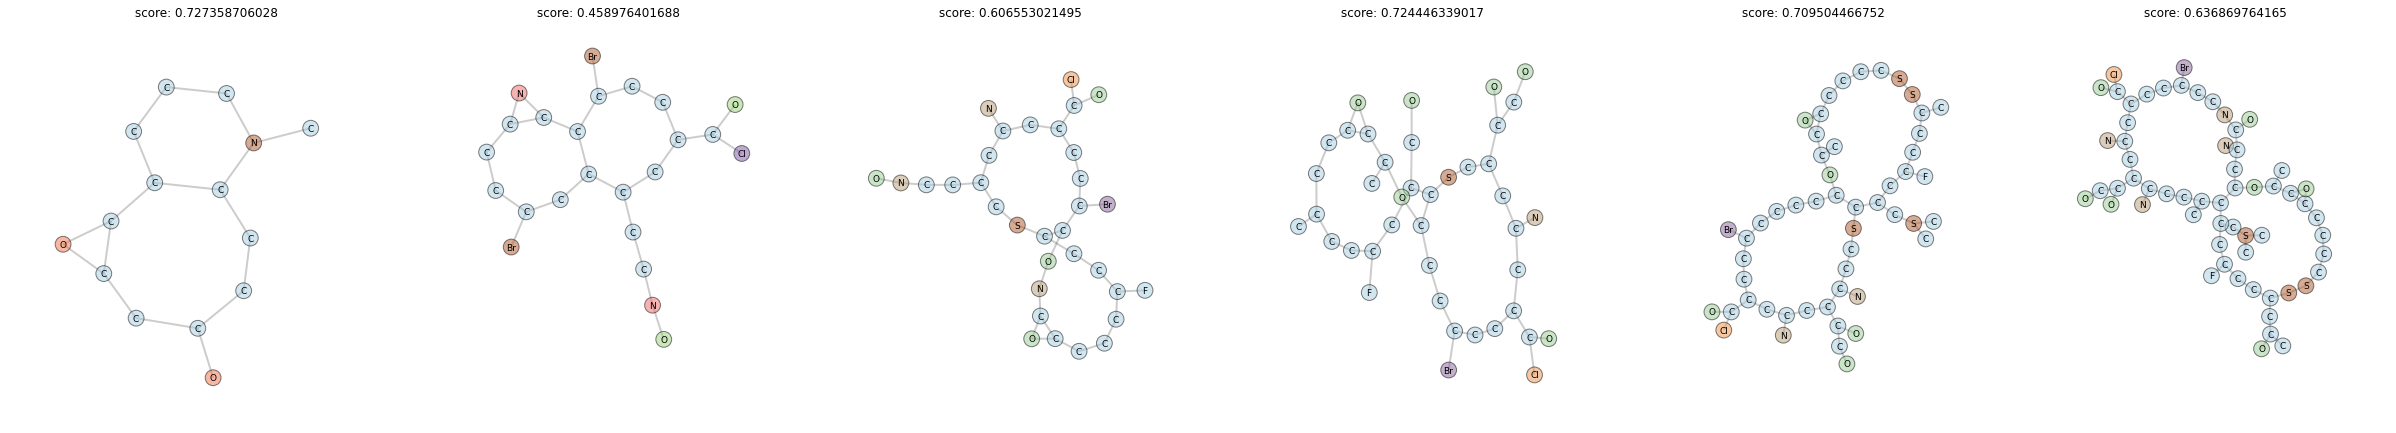

Graph id: 56


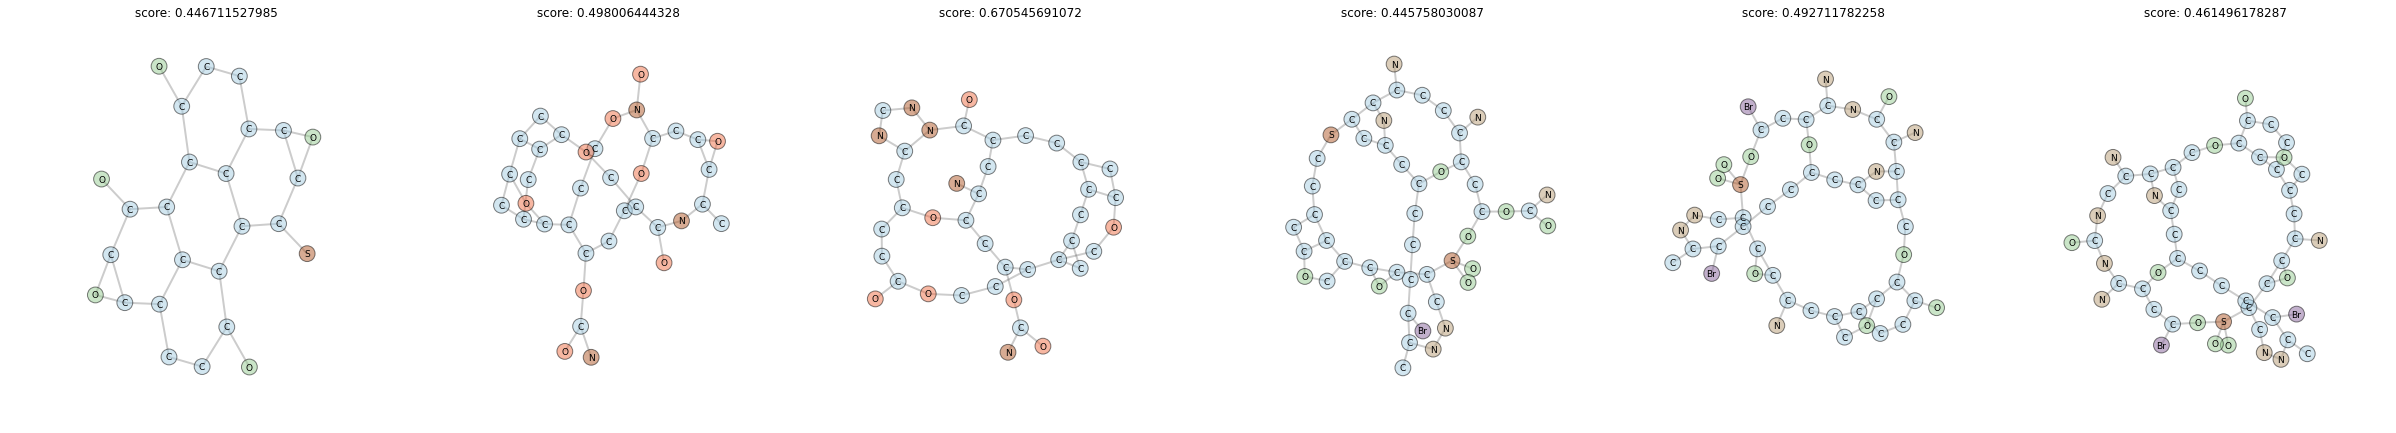

Graph id: 57


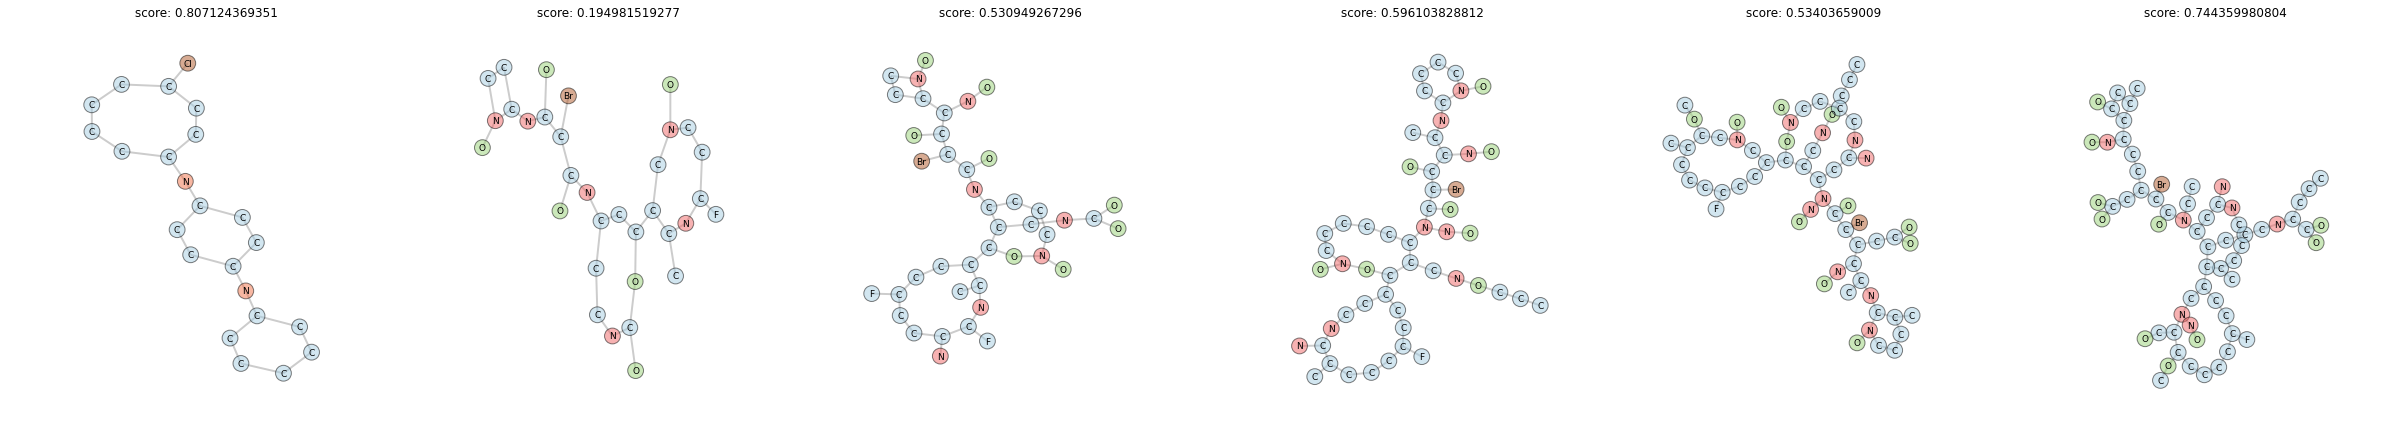

Graph id: 58


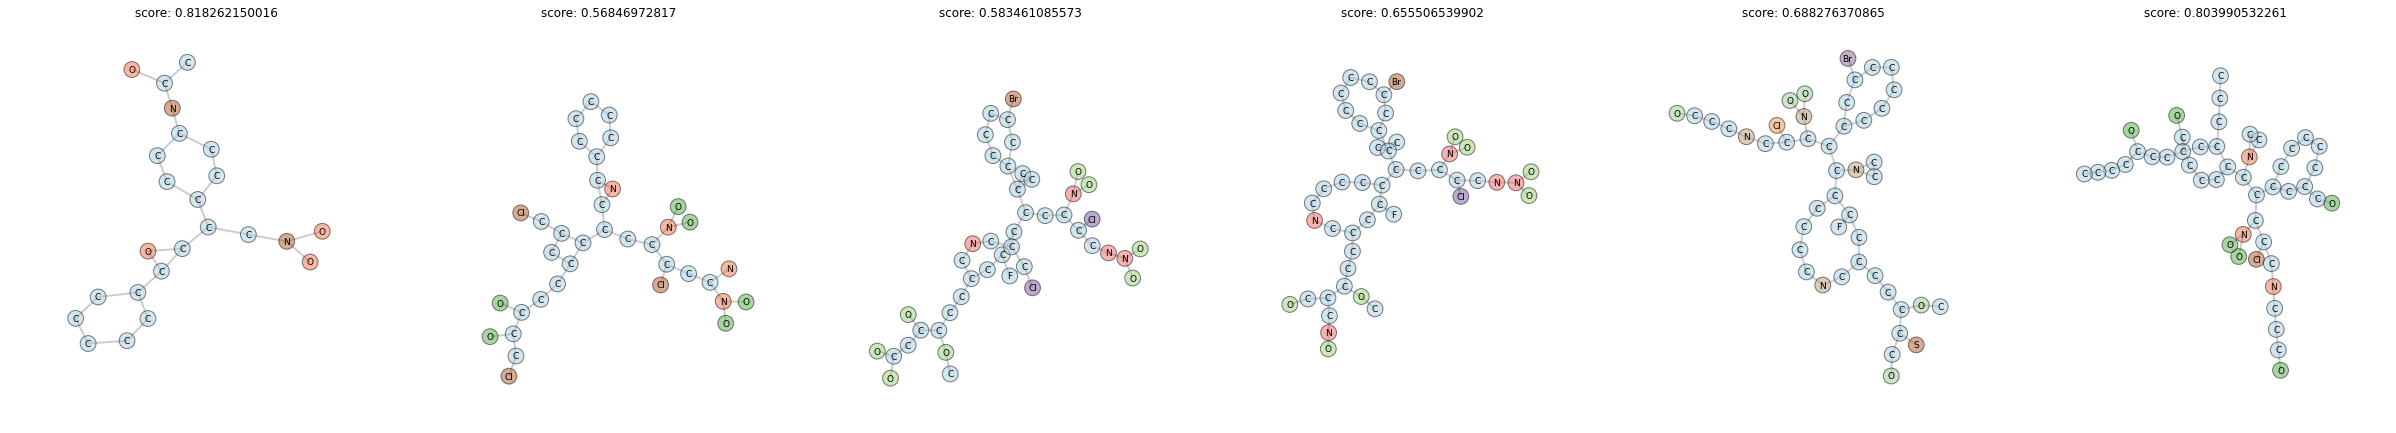

Graph id: 59


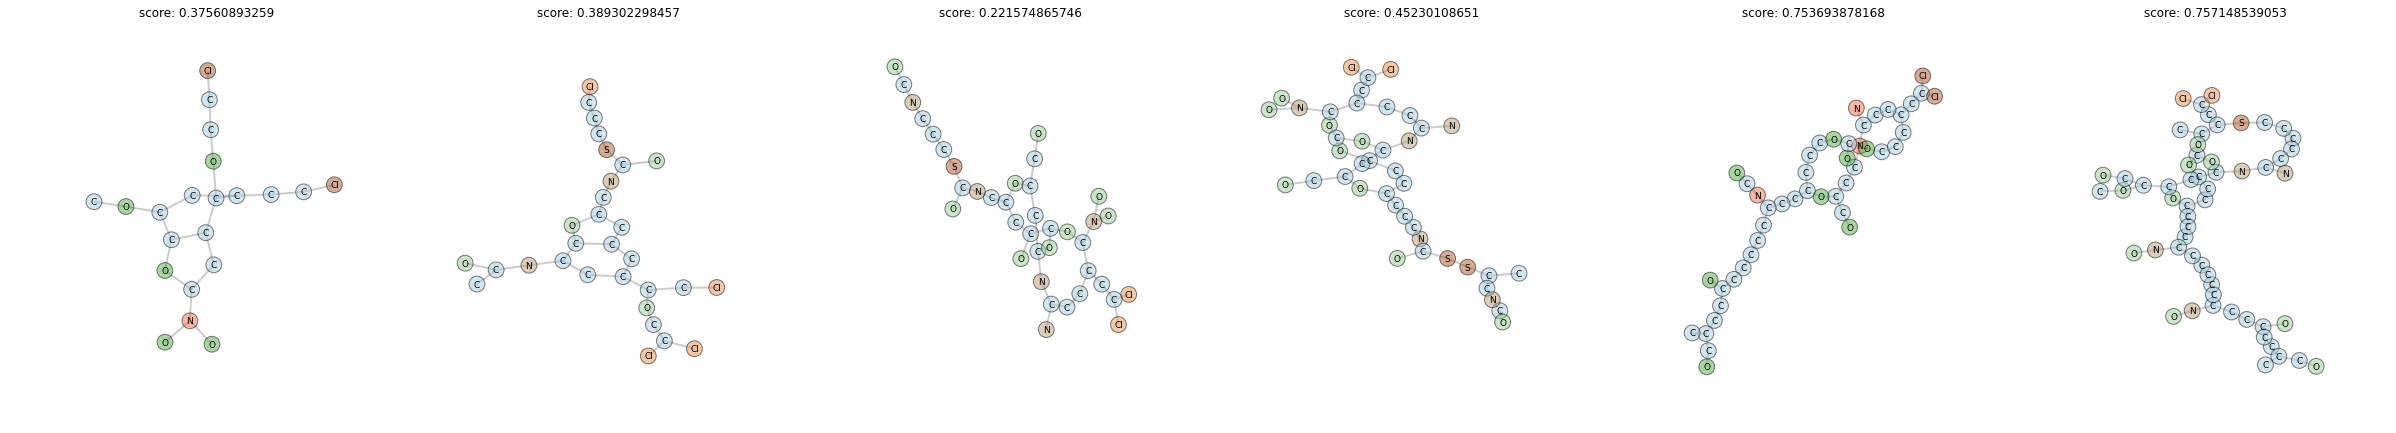

Graph id: 60


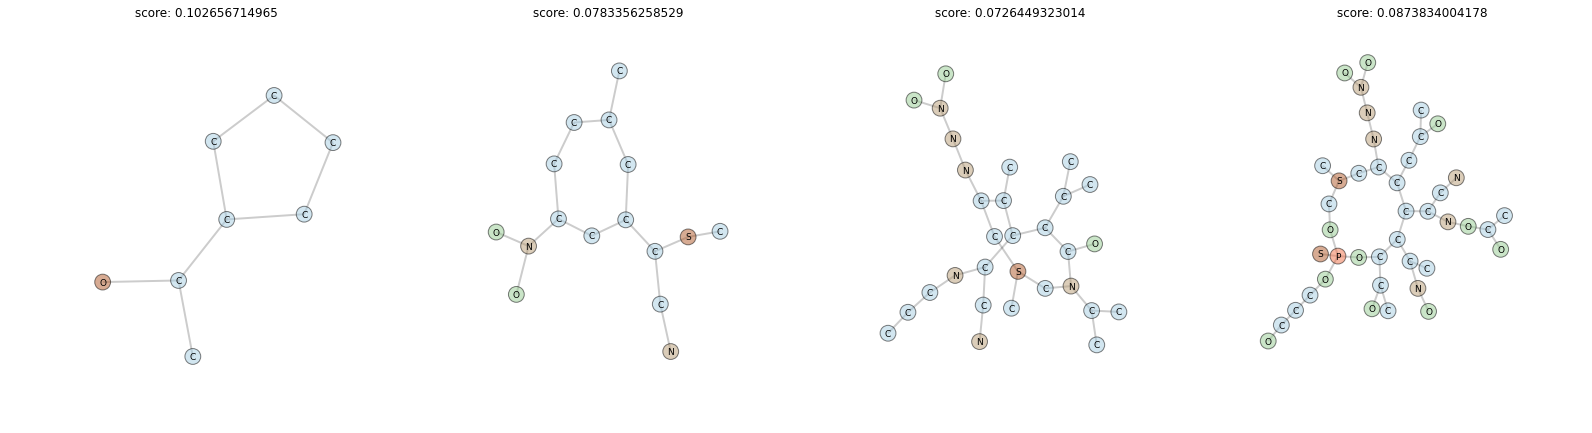

Graph id: 61


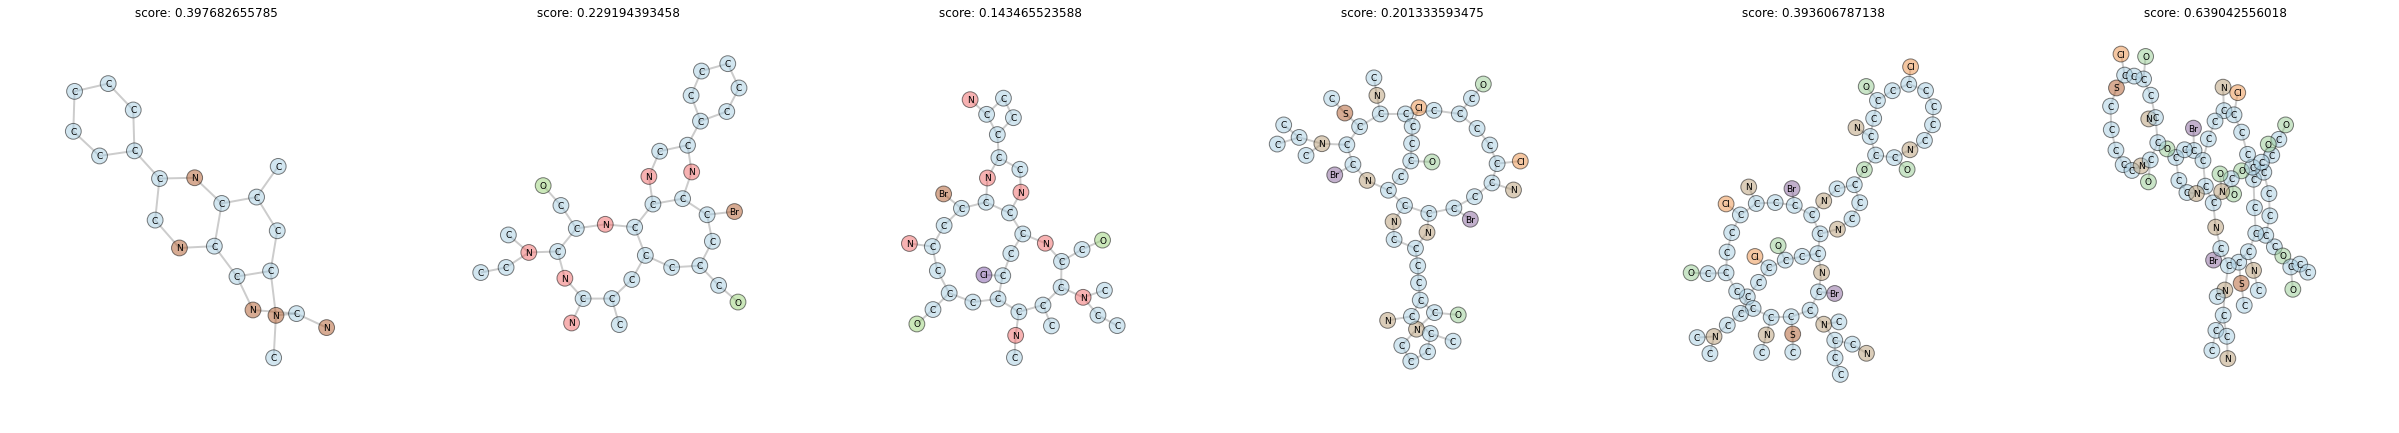

CPU times: user 22.4 s, sys: 2.58 s, total: 25 s
Wall time: 49.2 s


In [6]:
%%time
'''
Graph sampling
'''
graphs = get_graphs(size=100)
id_start=50
id_end=id_start+12
from itertools import islice
graphs = islice(graphs,id_start,id_end)
n_steps=60
sampler.feasibility_checker.draw_problem=False
graphs = sampler.sample(graphs,
                        same_radius=False,
                        same_core_size=False,
                        n_samples=6,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=-1,
                        accept_annealing_factor=0.9,
                        probabilistic_core_choice=False,
                        burnout=0,
                        select_cip_max_tries=200,
                        keep_duplicates=False)

from graphlearn.utils.draw import draw_graph_set_graphlearn, get_score_of_graph
from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['C','O','N','P','Cl','Br','S','I'])
    draw_graph_set_graphlearn(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=250,
                   headlinehook=get_score_of_graph)

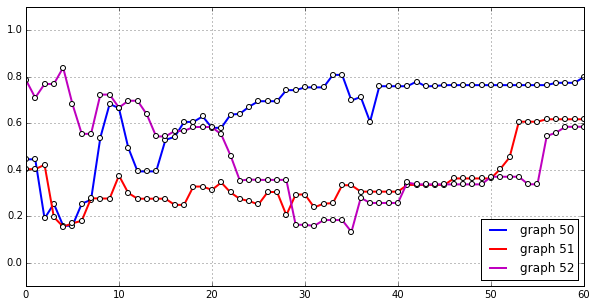

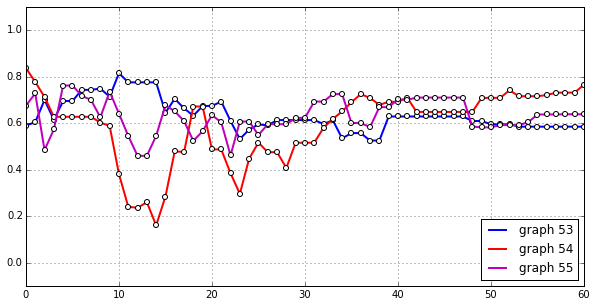

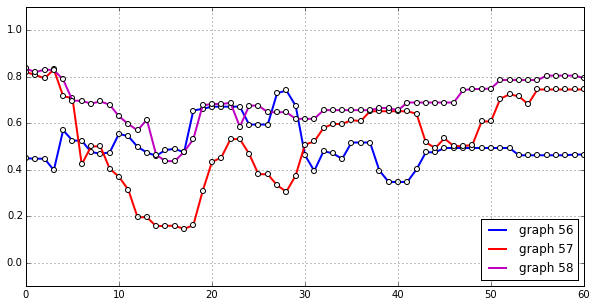

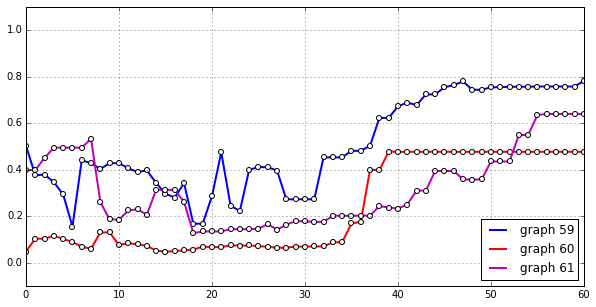

In [13]:
from itertools import islice
import numpy as np
import pylab as plt
step=n_steps
step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        plt.plot(data, linestyle='None', markerfacecolor='white', marker='o', markeredgewidth=1,markersize=5)
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()